<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/20_Interpreting_the_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Save and load machine learning models**

Model progress can be saved during—and after—training. Models can also be resumed from where it was left off and avoid long training times. 

Saving models also help to share the models, so that others can recreate the work. 

When publishing research models and techniques, most machine learning practitioners share:

- code to create the model, and
- the trained weights, or parameters, for the model

Sharing this data helps others understand how the model works and helps to try the model with new data.

However, one need to have caution when dealing with untrusted code — TensorFlow models are code, and hence it is recommended to adopt TensorFlow Security best practices.

Source: www.tensorflow.org

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Import fundamental libraries used for the tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np

import os
import h5py

In [ ]:
# Load the Fashion MNIST Data from TensorFlow Keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Shape of data
print("Train Images: ", train_images.shape)
print("Test Images: ", test_images.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Shape of data
print("Reshaped Train Images: ", train_images.shape)
print("Reshaped Test Images: ", test_images.shape)

Reshaped Train Images:  (60000, 28, 28, 1)
Reshaped Test Images:  (10000, 28, 28, 1)


**Keras pooling layers**

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. 

- Convolution => Convolution => Flatten => Dense

The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

- Convolution => Max pooling => Convolution => Flatten => Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(100, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(50, kernel_size=2, activation='relu',
input_shape=(28, 28, 1)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 100)       500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        20050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                72010     
Total params: 92,560
Trainable params: 92,560
Non-trainable params: 0
_________________________________________________________________


**Train a deep CNN with pooling to classify images**

Training a CNN with pooling layers is very similar to training of the deep networks. 

Once the network is constructed, the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Save checkpoints during training**

It is possible to use a trained model without having to retrain it, or pick-up training from where it was left off—in case the training process was interrupted. 

The tf.keras.callbacks.ModelCheckpoint callback allows to continually save the model both during and at the end of training.

**Checkpoint callback usage**

Create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training:

In [ ]:
checkpoint_path = "/content/Results"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
# Fit the model to training data 
model.fit(train_images, train_labels, validation_split=0.2, epochs=3, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2432 - accuracy: 0.9117 - val_loss: 0.3301 - val_accuracy: 0.8904
Epoch 2/3
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2396 - accuracy: 0.9115 - val_loss: 0.3336 - val_accuracy: 0.8866
Epoch 3/3
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2313 - accuracy: 0.9140 - val_loss: 0.3495 - val_accuracy: 0.8817


A single collection of TensorFlow checkpoint files are created and updated at the end of each epoch.

In [ ]:
!ls {checkpoint_dir}

Results  sample_data


**Plot the learning curves**

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process.

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2923 - accuracy: 0.8930 - val_loss: 0.3220 - val_accuracy: 0.8882
Epoch 2/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2773 - accuracy: 0.8980 - val_loss: 0.3315 - val_accuracy: 0.8852
Epoch 3/3
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2644 - accuracy: 0.9015 - val_loss: 0.3291 - val_accuracy: 0.8892


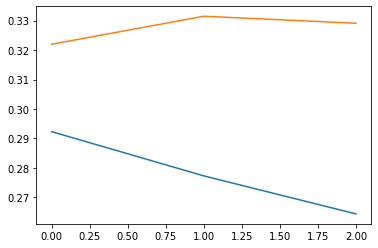

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_images, train_labels,
epochs=3, batch_size = 10, validation_split=0.2)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

**Evaluating a CNN with test data**

To evaluate a trained neural network, provide a separate testing data set of labeled images.

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_images, test_labels, batch_size=10)

10000/10000 [==============================] - 5s 471us/step


[0.3801005983844516, 0.8734999895095825]

**Extracting a kernel from a trained network**

One way to interpret models is to examine the properties of the kernels in the convolutional layers. 

Here we extract one of the kernels from a convolutional neural network with weights saved in a hdf5 file.

In [ ]:
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

find('*.hdf5', '/')

['/usr/local/lib/python3.6/dist-packages/astropy/io/misc/tests/data/old_meta_example.hdf5',
 '/usr/local/lib/python3.6/dist-packages/textgenrnn/textgenrnn_weights.hdf5']

In [ ]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

OSError: ignored